<a href="https://colab.research.google.com/github/yangsu0/class_machine_learning/blob/master/ML_Assignment6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

#data preparation
data    = np.genfromtxt("data-nonlinear.txt", delimiter=',')

pointX  = data[:, 0]
pointY  = data[:, 1]
label   = data[:, 2]

pointX0 = pointX[label == 0]
pointY0 = pointY[label == 0]

pointX1 = pointX[label == 1]
pointY1 = pointY[label == 1]

In [0]:
#initialize step_size and theta

step_size = 0.045
theta = np.zeros(9)

In [0]:
#define g function and sigmoid function
def g_function(x, y):
  return theta[0] + theta[1] * x + theta[2] * y + theta[3] * (x**2) + theta[4] * (y**2) + theta[5] * (x**2)* (y**2) + theta[6] * (x * y) + theta[7] * (x**4) + theta[8] * (y**4)

def sigmoid(x, y):
  z = g_function(x, y)
  return 1/(1+np.exp(-z))

In [0]:
#object function

def object_function(m):
  return (1/m) *  sum((-label[i] * np.log(sigmoid(pointX[i], pointY[i]))) - ((1-label[i]) * (np.log(1-sigmoid(pointX[i], pointY[i]))))  for i in range(m))

In [0]:
#define gradient descent

def gradient_descent(m):
  theta[0] -= step_size * (1/m) * sum((sigmoid(pointX[i], pointY[i]) - label[i]) for i in range(m))
  theta[1] -= step_size * (1/m) * sum(((sigmoid(pointX[i], pointY[i]) - label[i])* pointX[i]) for i in range(m))
  theta[2] -= step_size * (1/m) * sum(((sigmoid(pointX[i], pointY[i]) - label[i])* pointY[i]) for i in range(m))
  theta[3] -= step_size * (1/m) * sum(((sigmoid(pointX[i], pointY[i]) - label[i])* (pointX**2)[i]) for i in range(m))
  theta[4] -= step_size * (1/m) * sum(((sigmoid(pointX[i], pointY[i]) - label[i])* (pointY**2)[i]) for i in range(m))
  theta[5] -= step_size * (1/m) * sum(((sigmoid(pointX[i], pointY[i]) - label[i])* (pointX**2)[i]*(pointY**2)[i]) for i in range(m))
  theta[6] -= step_size * (1/m) * sum(((sigmoid(pointX[i], pointY[i]) - label[i])* (pointX[i]) * (pointY[i])) for i in range(m))
  theta[7] -= step_size * (1/m) * sum(((sigmoid(pointX[i], pointY[i]) - label[i])* (pointX**4)[i]) for i in range(m))
  theta[8] -= step_size * (1/m) * sum(((sigmoid(pointX[i], pointY[i]) - label[i])* (pointY**4)[i]) for i in range(m))


In [0]:
#define value list variables
m = 100
total = len(label)

e_values = []
theta_values = []
acc_values = []

for i in range(9):
  theta_values.append([])

In [0]:
#define training accuracy
def training_accuracy():
  cor = 0

  for i in range(len(pointX0)):
    if sigmoid(pointX0[i], pointY0[i]) < 0.5:
      cor+=1
  for i in range(len(pointX1)):
    if sigmoid(pointX1[i], pointY1[i]) >= 0.5:
      cor+=1
  
  return cor/total

In [30]:
#Loop while the object function convergence 

while(1):
  j = object_function(m)
  gradient_descent(m)
  new_j = object_function(m)
  acc = training_accuracy()

  e_values.append(new_j)
  acc_values.append(acc)

  for i in range(9):
    theta_values[i].append(theta[i])

  #until convergence
  print(new_j)
  if abs(j-new_j) < 0.00000001:
    break

Streaming output truncated to the last 5000 lines.
0.2831335496522003
0.28313353923046036
0.2831335288088066
0.28313351838723916
0.28313350796575815
0.28313349754436334
0.28313348712305497
0.28313347670183286
0.2831334662806969
0.2831334558596474
0.28313344543868424
0.2831334350178073
0.2831334245970167
0.2831334141763126
0.2831334037556946
0.2831333933351629
0.2831333829147175
0.2831333724943584
0.2831333620740856
0.2831333516538992
0.2831333412337991
0.2831333308137852
0.2831333203938578
0.28313330997401653
0.2831332995542616
0.2831332891345928
0.2831332787150107
0.2831332682955144
0.2831332578761047
0.28313324745678126
0.2831332370375441
0.2831332266183932
0.2831332161993287
0.28313320578035034
0.28313319536145826
0.2831331849426526
0.28313317452393316
0.2831331641053001
0.2831331536867532
0.2831331432682928
0.2831331328499184
0.2831331224316305
0.28313311201342883
0.28313310159531324
0.2831330911772841
0.2831330807593414
0.2831330703414849
0.2831330599237144
0.2831330495060305
0.28

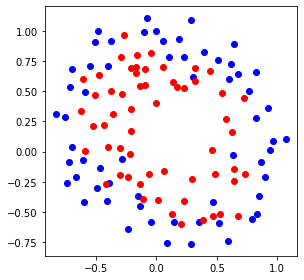

In [36]:
#Plot the training data
plt.figure()
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

The equation for the non-linear function $g(x,y;θ)$

> $\theta_8y^4+\theta_7x^4+\theta_6xy+\theta_5x^2y^2+\theta_4y^2+\theta_3x^2+\theta_2y+\theta_1x+\theta_0$

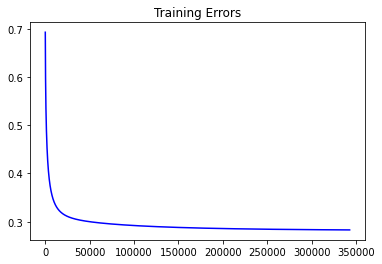

In [37]:
#plotting training errors
e_values = np.array(e_values)
plt.title('Training Errors')
plt.plot(e_values,'b')
plt.show()

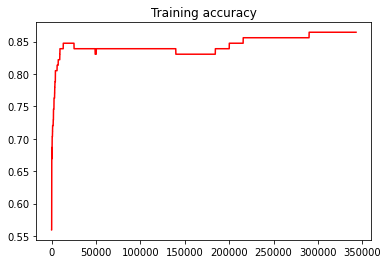

In [38]:
#Plot the training accuracy
acc_values = np.array(acc_values)
plt.title('Training accuracy')
plt.plot(acc_values,'r')
plt.show()